In [1]:
#!/usr/bin/env python
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, exp,  tan, absolute, pi, arange, random
from numpy.random import normal, uniform

layers  = 2
bins    = 40
minx    = -5
maxx    = 5
sigma_y = 0.001

def findVertices(fig, axarr, hits, plotLines = None, plotFirst = False) :
    xvertices_good  = []
    xvertices_bad   = []
    chi2_good       = []
    chi2_bad        = []
    # the two layer setup
    if layers is 2:
        for hit0 in hits[0] :
            for hit1 in hits[1] :
                x0 = hit0[0]
                y0 = hit0[1]
                x1 = hit1[0]
                y1 = hit1[1]
                # --- 
                k = (y1-y0)/(x1-x0)
                d = y1 - k*x1
                # now solve for y == 0
                xi = -d/k
                if (xi *xi < maxx*maxx) :
                    x = linspace(minx, maxx, 10)
                    y = k*x+d
                    # only plot the lines if configured
                    if plotLines : axarr[0].plot(x,y,'b')
                    # register the x vertices
                    xvertices_good += [ xi ]
                    if plotFirst : break
                if plotFirst : break
        # drawing the vertices
        axarr[1].hist(xvertices_good,50, color='b')                
    # we need fitting
    if layers is 3 :            
        for hit0 in hits[0] :
            for hit1 in hits[1] : 
                for hit2 in hits[2] :
                    xl       = np.array([hit0[0], hit1[0], hit2[0]])
                    yl       = np.array([hit0[1], hit1[1], hit2[1]])
                    weights = np.array([sigma_y,sigma_y,sigma_y])
                    p = np.polyfit(xl, yl, 1, w = weights)
                    #
                    x = linspace(minx, maxx, 10)
                    y = p[1]+p[0]*x
                    # only go on if it makes sense
                    if (p[0]*p[0] > (1./maxx)**2 ) :
                       # 
                       chi_squared = np.sum((np.polyval(p, xl) - yl) ** 2)
                       if chi_squared < 0.0000001:
                           #
                           if plotLines : axarr[0].plot(x,y,'b')
                           if p[0] is not 0 : 
                               xvertices_good +=  [ -p[1]/p[0] ]
                               chi2_good += [ chi_squared ]
                       else :
                           #if plotLines : axarr[0].plot(x,y,'r')
                           if p[0] is not 0 : 
                               xvertices_bad +=  [ -p[1]/p[0] ]
                               chi2_bad += [ chi_squared ]
        # plot the histogram                
        axarr[1].hist(xvertices_good,50, color='b')       
        axarr[2].hist(chi2_good,50, color='b')       
    
    # update the canvas        
    fig.canvas.draw()                 


def buildDetector() :
    # plot the detector
    if layers is 2 : fig, axarr = plt.subplots(1, 2, figsize=(15,5))
    else : fig, axarr = plt.subplots(1, 3, figsize=(18,4))
    # some style formatting
    fig.set_facecolor('w')
    axarr[0].set_title(str(layers)+'-layer toy detector')
    # and now the vertical ones
    for ilayer in range(layers) : axarr[0].hlines(ilayer+1,minx,maxx)
    axarr[0].set_xlim([minx-1,maxx+1])
    axarr[0].set_ylim([0,layers+1])
    axarr[0].autoscale(False) 
    axarr[1].set_title('vertex position')
    if len(axarr) > 2  : 
        axarr[2].set_title('chi2')
    return fig, axarr

    
def shoot(fig, axarr, nvertices = 1, number = 1, seed = None, plotDots = None, plotLines = None) :
    # set the seed if configured
    if seed : random.seed(seed)
    # prepare the return object
    inters = []
    for ilayer in range(layers) : inters += [ [] ]
    # 
    for ivertex in range(nvertices) :
        # vertex distribution around -1,1
        vertex_x = 0
        color_x = 'r'
        if nvertices > 1 : 
            while vertex_x is 0 or vertex_x*vertex_x > 4 : 
                vertex_x = normal()
            color_x  = (uniform(),uniform(),uniform())
        #
        print('vertex', ivertex, ' - position is ', vertex_x)
        # the number of tracks per vertex
        for ip in range(number) :
            # we have the 
            k = tan(pi*uniform())
            #
            d = 0 
            if vertex_x is not 0 : d = -k*vertex_x
            if ( k*k > (1./maxx)**2 ) :
                x = linspace(minx, maxx, 10)
                y = k*x+d
                # only plot the lines if configured
                if plotLines : axarr[0].plot(x,y,color=color_x)
                # create the intersection points
                for ilayer in range(layers) :
                    yl = ilayer + 1
                    xl = (yl-d)/k
                    if xl*xl < maxx*maxx : 
                        if plotDots :  axarr[0].plot(xl,yl,'o',color=color_x)
                        inters[ilayer] += [ (xl,yl)]
    # update the canvas        
    fig.canvas.draw()
    return inters



vertex 0  - position is  -0.20470765948471295
vertex 1  - position is  0.47894333805754824
[[(-0.5142220080057665, 1), (-0.7268702072071743, 1), (-1.1978613499619677, 1), (-0.7284415935308405, 1), (-1.1904514848029926, 1), (2.6733711465761907, 1), (0.5280754460566809, 1), (-0.7398700147915548, 1), (-1.6743006659029425, 1), (-2.5596074359526777, 1), (-1.051670587037337, 1), (-0.6848054409842715, 1), (-1.0185934063099655, 1), (-0.10256391226731122, 1), (0.40556937692757605, 1), (-0.012790077784891211, 1), (-0.817150594266595, 1), (2.158820133738469, 1), (-0.900810651621375, 1), (-2.725787216112341, 1), (0.504875712526571, 1), (0.3962727302642685, 1), (0.1665993278260289, 1), (-2.4445005071090176, 1), (-0.3930408165653506, 1), (-1.0788962821971502, 1), (0.4782435392750445, 1), (-0.9943970544673458, 1), (3.6946464251947675, 1), (1.6958865019530844, 1), (1.4256074801493397, 1), (0.5794787438362039, 1), (0.6072737847319508, 1)], [(-0.8237363565268201, 2), (-1.2490327549296356, 2), (-2.191015

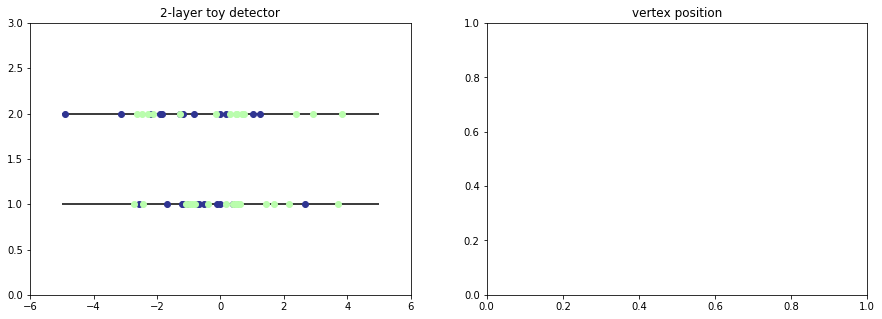

In [4]:
fig, plots = buildDetector()
#hits = shoot(fig, plots, nvertices=1, number=20, seed=12345, plotDots=True, plotLines=None)
hits = shoot(fig, plots, nvertices=2, number=20, seed=12345, plotDots=True, plotLines=None)

print(hits)

findVertices(fig,plots,hits, plotLines=True)